# High order epistasis in $\beta$ lactamase drug resistance

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 10

# Epistasis imports
from epistasis.models.linear import LocalEpistasisModel
from epistasis.plotting import bar_with_xbox, magnitude_vs_order

## Introduction

Load data from `.json` file.

In [3]:
in_path = "../../Dropbox/epistasis-paper/datasets/weinreich.json"
out_path = "../../Dropbox/epistasis-paper/figures/epistasis-weinreich-test.svg"

## Epistasis Analysis

Initialize and fit epistasis model to log transformed data, following e

In [4]:
model = LocalEpistasisModel.from_json(in_path)
model.fit()
model.fit_error()

In [5]:
model.Interactions.Raw.values

array([ 1.01196987,  1.        ,  1.        ,  1.00929413,  0.99308512,
        1.03776331,  1.        ,  1.00603186,  1.00696302,  1.        ,
        1.02820701,  1.04498928,  1.02448394,  1.01303689,  1.04760022,
        1.0435141 ,  1.030085  ,  0.95694762,  1.03206768,  0.98713089,
        0.9940043 ,  1.01324626,  0.94250748,  0.98936089,  0.95304091,
        0.95255474,  1.023836  ,  0.92293983,  0.99237342,  1.03475416,
        1.10631609,  1.09587057])

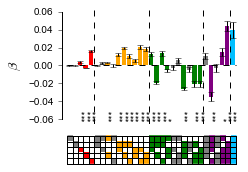

In [7]:
fig, ax = bar_with_xbox(model, log_space=True, sigmas=1, height_ratio=4.0, figsize=(3.5,2.5), star_spacer=.03)
ax[0].set_ylabel("$\\beta$")

In [17]:
fig.savefig(out_path, format="svg")

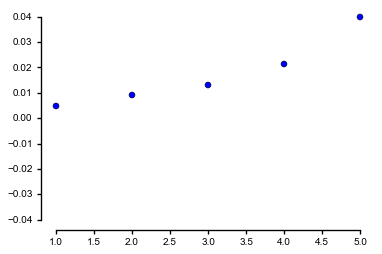

In [8]:
magnitude_vs_order(model)

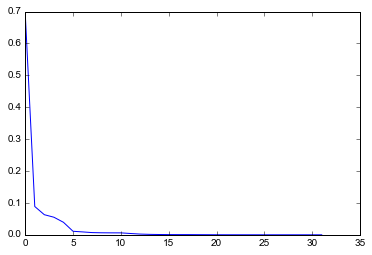

In [18]:
from epistasis.models.pca import EpistasisPCA
pca = EpistasisPCA.from_json(in_path, order=5)
pca.fit()
plt.plot(pca.explained_variance_ratio)

In [19]:
sum(pca.explained_variance_ratio[0:6])

0.95370940801072368